# NLP相关

## 马尔科夫过程

### 随机过程(过程)
设T是一无限实数集，把依赖于参数$t\in T$的一族(无限多个)随机变量称为随机过程，记为{X(t), $t\in T$}
### 状态|状态空间
我们常把t看作为时间，成X{t}为时刻t时过程的状态。

对于一切$t\in T$, X(t)所有可能去的一切智的全体称为随机过程的状态空间。
### 马尔可夫性(无后效性)
过程或系统在时刻t0所处的状态为已知的条件下，过程在时刻t>t0所处状态的条件分布与过程在时刻t0之前所处的状态无关。

通俗的说，就是在已知过程“现在”的条件下，其“将来”不依赖于“过去”
### 马尔科夫过程
符合马尔科夫性的过程
### 马氏链、齐次马氏链
时间和状态都是离散的马尔科夫过程称为马尔科夫链

如果转移概率矩阵P(t)与t无关，则称该马氏链是齐次马氏链
### 转移概率矩阵、一步转移概率矩阵
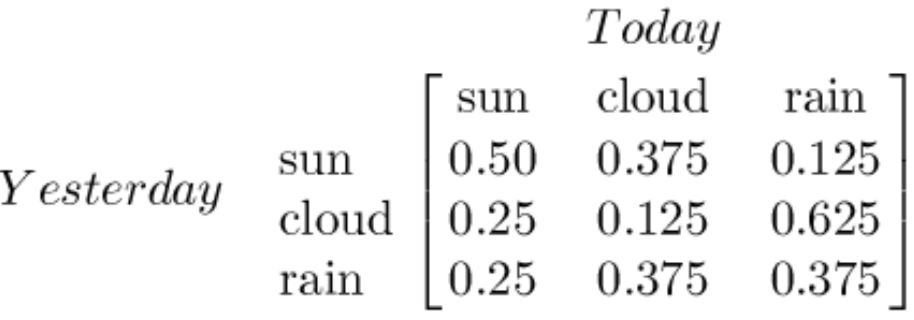

#### 求多步转移概率矩阵
C-K方程，转化为求一步转移概率矩阵的幂。

对于齐次马氏链而言，n步转移概率矩阵是一步转移概率矩阵的n次方

### 遍历性
即 n步转移概率 当n取极限时，和起始态无关，只与要转移到终态有关！
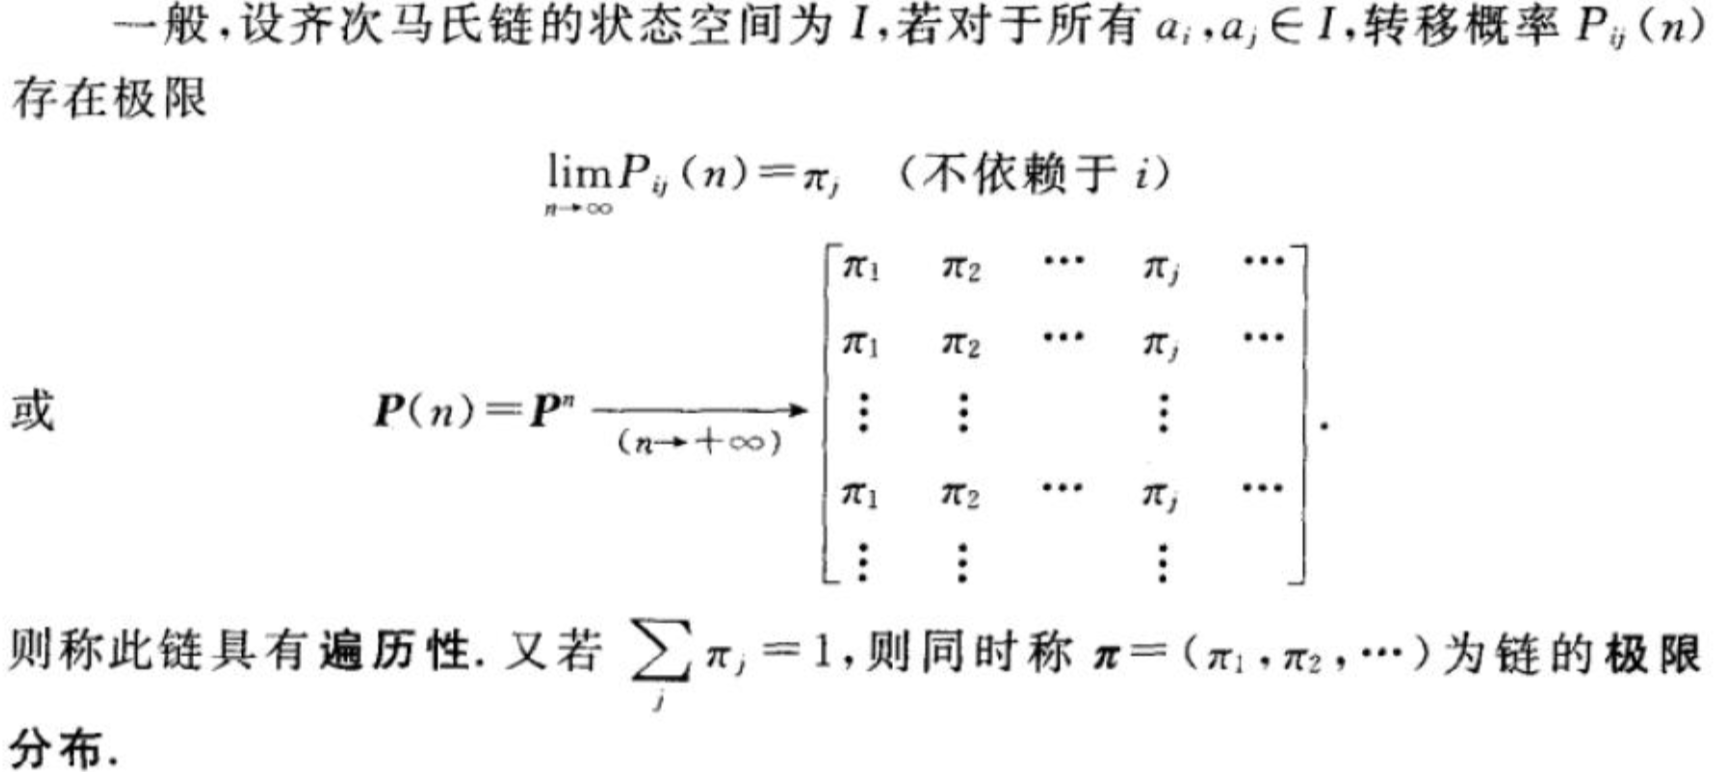

如果 转移概率矩阵中的值都大于0，在该马氏链具有遍历性！
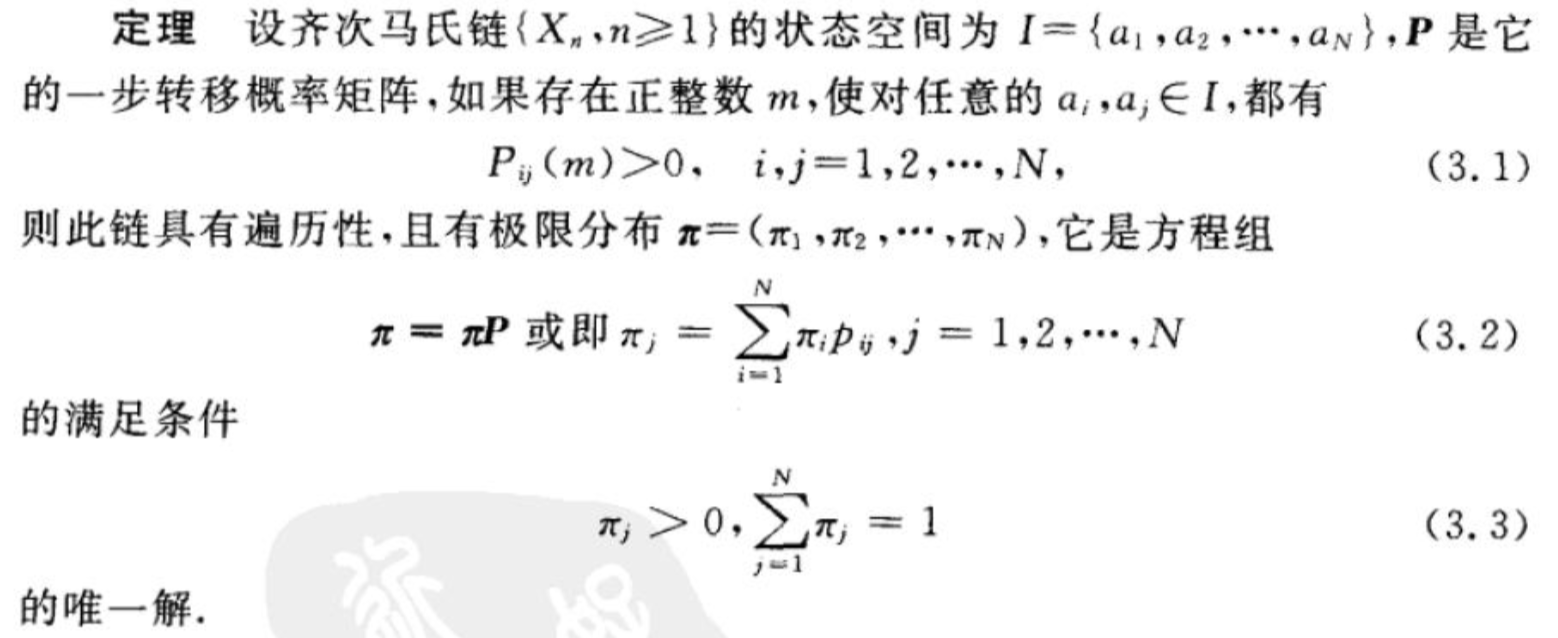

## 隐马尔科夫过程(HMM)
https://www.cnblogs.com/pinard/p/6945257.html

### 什么样的问题需要HMM模型
首先我们来看看什么样的问题解决可以用HMM模型。使用HMM模型时我们的问题一般有这两个特征：１）我们的问题是基于序列的，比如时间序列，或者状态序列。２）我们的问题中有两类数据，一类序列数据是可以观测到的，即观测序列；而另一类数据是不能观察到的，即隐藏状态序列，简称状态序列。

　　　　有了这两个特征，那么这个问题一般可以用HMM模型来尝试解决。这样的问题在实际生活中是很多的。比如：我现在在打字写博客，我在键盘上敲出来的一系列字符就是观测序列，而我实际想写的一段话就是隐藏序列，输入法的任务就是从敲入的一系列字符尽可能的猜测我要写的一段话，并把最可能的词语放在最前面让我选择，这就可以看做一个HMM模型了。再举一个，我在和你说话，我发出的一串连续的声音就是观测序列，而我实际要表达的一段话就是状态序列，你大脑的任务，就是从这一串连续的声音中判断出我最可能要表达的话的内容。

　　　　从这些例子中，我们可以发现，HMM模型可以无处不在。但是上面的描述还不精确，下面我们用精确的数学符号来表述我们的HMM模型。
### HMM模型的定义
对于HMM模型，首先我们假设𝑄是所有可能的隐藏状态的集合，𝑉是所有可能的观测状态的集合，即：
𝑄={𝑞1,𝑞2,...,𝑞𝑁},𝑉={𝑣1,𝑣2,...𝑣𝑀}

其中，𝑁是可能的隐藏状态数，𝑀是所有的可能的观察状态数。

对于一个长度为𝑇的序列，𝐼对应的状态序列, 𝑂是对应的观察序列，即：
𝐼={𝑖1,𝑖2,...,𝑖𝑇},𝑂={𝑜1,𝑜2,...𝑜𝑇}

其中，任意一个隐藏状态𝑖𝑡∈𝑄,任意一个观察状态𝑜𝑡∈𝑉
#### HMM模型做了两个很重要的假设

1） 齐次马尔科夫链假设。即任意时刻的隐藏状态只依赖于它前一个隐藏状态。

当然这样假设有点极端，因为很多时候我们的某一个隐藏状态不仅仅只依赖于前一个隐藏状态，可能是前两个或者是前三个。但是这样假设的好处就是模型简单，便于求解。如果在时刻𝑡的隐藏状态是𝑖𝑡=𝑞𝑖,在时刻𝑡+1的隐藏状态是𝑖𝑡+1=𝑞𝑗, 则从时刻𝑡到时刻𝑡+1的HMM状态转移概率𝑎𝑖𝑗可以表示为：
$$a_{ij}=P(i_{t+1}=q_j|i_t=q_i)$$
这样𝑎𝑖𝑗可以组成马尔科夫链的状态转移矩阵𝐴:
$$A=[a_{ij}]_{M*N}$$
2） 观测独立性假设。即任意时刻的观察状态只仅仅依赖于当前时刻的隐藏状态，这也是一个为了简化模型的假设。如果在时刻𝑡的隐藏状态是𝑖𝑡=𝑞𝑗, 而对应的观察状态为𝑜𝑡=𝑣𝑘, 则该时刻观察状态𝑣𝑘在隐藏状态𝑞𝑗下生成的概率为𝑏𝑗(𝑘),满足：
$$b_j(k)=P(o_t=v_k|i_t=q_j)$$
这样𝑏𝑗(𝑘)可以组成观测状态生成的概率矩阵𝐵:
$$B=[b_j(k)]_{N*M}$$

一个HMM模型，可以由隐藏状态初始概率分布$\Pi$, 状态转移概率矩阵𝐴和观测状态概率矩阵𝐵决定。$\Pi$,𝐴决定状态序列，𝐵决定观测序列。因此，HMM模型可以由一个三元组𝜆表示如下：
$$\lambda=(A,B,\Pi)$$